We start by opening the files and loading them into a Numpy array

In [33]:
import h5py
import pandas
from copy import deepcopy
import numpy as np
from sklearn.preprocessing import RobustScaler
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from bayes_opt import BayesianOptimization
#import shap
import tensorflow

In [34]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pandas.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [35]:
## temporarily use a fraction of the data to speed everything up
#train=train.sample(frac = 0.3)

Then we can verify the shape

In [36]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As expected, the test set contains 2 columns less: `Truth` and `p_truth_E`.
    
Then we copy the variable list from the course website <https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/VariableList.html>

In [37]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

Finally, we divide the training data into data (`X`) and labels (`y`)

In [38]:
X = train[all_variables]
X_test = test[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of X_test: {X_test.shape}')


print (f'Shape of y: {y.shape}')

Shape of X: (162500, 160)
Shape of X_test: (160651, 160)
Shape of y: (162500,)


In [39]:
X.head(1)

,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,p_pt_track,p_eta,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,26.5,26.5,26.5,26.5,26.5,26.5,18,3,42011.792969,1.834715,...,215.588013,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594


In [40]:
target_count = y.value_counts()

Proportion: 2.96 : 1


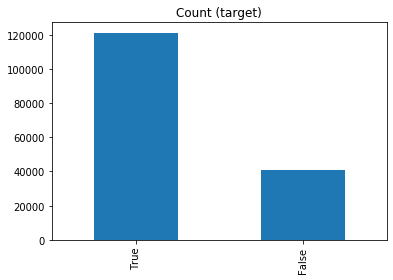

In [41]:
print('Proportion:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Preprocessing

### Check null values

In [42]:
train.isnull().sum()

eventNumber                       0
runNumber                         0
actualInteractionsPerCrossing     0
averageInteractionsPerCrossing    0
correctedActualMu                 0
                                 ..
p_E7x11_Lr2                       0
p_E7x11_Lr3                       0
p_E7x7_Lr0                        0
p_E7x7_Lr1                        0
index                             0
Length: 166, dtype: int64

No nulls
### Scale the data

In [43]:
transformed_X = deepcopy(X) 
transformed_X_test = deepcopy(X_test)
# This loop transforms every variable _independently_ 
for variable in X.columns: 
    scaler = RobustScaler().fit(np.array(transformed_X[variable]).reshape(-1,1))
    transformed_X[variable] = scaler.transform(np.array(transformed_X[variable]).reshape(-1,1))
    transformed_X_test[variable] = scaler.transform(np.array(transformed_X_test[variable]).reshape(-1,1))

### Select k Best features

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [45]:
# Create and fit selector
selector = SelectKBest(score_func=f_classif, k=25)
X_25 = selector.fit_transform(transformed_X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = train.iloc[:,cols]
features_df_new.columns

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  UserWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['correctedScaledAverageMu', 'p_eClusterLr0', 'p_dPhiTH3', 'p_R12',
       'p_fTG3', 'p_weta2', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_ndof',
       'p_E_Lr1_LowG', 'p_E_Lr3_HiG', 'p_deltaPhiRescaled3', 'p_e132',
       'p_e255', 'p_e2ts1', 'p_emins1', 'p_pos7', 'p_widths2', 'p_wtots1',
       'p_e237', 'p_e277', 'p_fracs1', 'p_E3x5_Lr2', 'p_E5x7_Lr2'],
      dtype='object')

In [46]:
transformed_X_test_25 = selector.transform(transformed_X_test)

## Bayesian optimisation of hyperparameters and cross validation

In [47]:
def sklNN_CrossValidation(hidden_layer_sizes, learning_rate_init, data, targets):
    """Cross validation.
       Fits a NN with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations
       that maximize the accuracy
    """
    
    estimator = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, random_state=0)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    
    return cval.mean()

In [48]:
def optimize_sklNN(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to NN parameters."""
    
    def crossval_wrapper(hidden_layer_sizes, learning_rate_init):
        """Wrapper of NNe cross validation. 
           hidden_layer_sizes
           is cast to integer before we pass them along.
        """
        return sklNN_CrossValidation(hidden_layer_sizes=int(hidden_layer_sizes), 
                                            learning_rate_init=learning_rate_init, 
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer

In [ ]:
parameters_BayesianOptimization = {"hidden_layer_sizes": (1, 500), 
                                   "learning_rate_init": (0.0001, 1)
                                  }

BayesianOptimization = optimize_sklNN(X_25, 
                                             y, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

Cross-validation on result:


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=int(BayesianOptimization.max['params']['hidden_layer_sizes']), 
                                 learning_rate_init=BayesianOptimization.max['params']['learning_rate_init'],
                                 random_state=0)
scores = cross_val_score(clf, X_25, y, cv=5, scoring='accuracy') 
print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

### Restrict the parameter space

In [49]:
parameters_BayesianOptimization = {"hidden_layer_sizes": (60, 100), 
                                   "learning_rate_init": (0.0001, 0.2)
                                  }

BayesianOptimization = optimize_sklNN(X_25, 
                                             y, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | hidden... | learni... |
-------------------------------------------------
|  1        |  0.897    |  74.98    |  0.1901   |
|  2        |  0.8977   |  89.28    |  0.1198   |
|  3        |  0.9177   |  66.24    |  0.03128  |
|  4        |  0.9063   |  62.32    |  0.1732   |
|  5        |  0.9205   |  100.0    |  0.0001   |
|  6        |  0.9036   |  97.31    |  0.2      |
|  7        |  0.9013   |  100.0    |  0.2      |
|  8        |  0.9203   |  81.87    |  0.0001   |
|  9        |  0.9202   |  60.0     |  0.0001   |
{'target': 0.9204738461538462, 'params': {'hidden_layer_sizes': 100.0, 'learning_rate_init': 0.0001}}


In [50]:
clf = MLPClassifier(hidden_layer_sizes=int(BayesianOptimization.max['params']['hidden_layer_sizes']), 
                                 learning_rate_init=BayesianOptimization.max['params']['learning_rate_init'],
                                 random_state=0)
scores = cross_val_score(clf, X_25, y, cv=5, scoring='accuracy') 
print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9204 accuracy with a standard deviation of 0.0007


/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [52]:
clf.fit(X_25,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Run algo on test data and make output files

In [63]:
mlp_BO_test_predictions=clf.predict_proba(transformed_X_test_25)[:,1]

In [64]:
mlp_BO_test_predictions.shape

(160651,)

(array([25996.,   933.,   710.,   967.,  1573.,  4991.,  9360.,  5435.,
        11251., 99435.]),
 array([9.80264896e-52, 9.99999982e-02, 1.99999996e-01, 2.99999994e-01,
        3.99999993e-01, 4.99999991e-01, 5.99999989e-01, 6.99999987e-01,
        7.99999985e-01, 8.99999983e-01, 9.99999982e-01]),
 <a list of 10 Patch objects>)

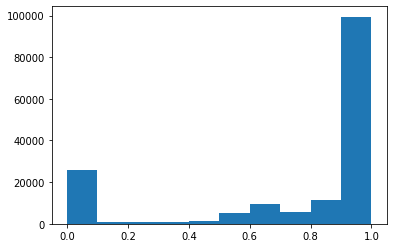

In [65]:
import matplotlib.pyplot as plt
plt.hist(mlp_BO_test_predictions)

In [66]:
out_df_BO=pandas.DataFrame(mlp_BO_test_predictions)

In [67]:
out_df_BO.to_csv('solutions/Classification_NiallGray_MLPalgoBayesOpt.txt',header=False)

In [69]:
feature_list=pandas.DataFrame(features_df_new.columns)

In [71]:
feature_list.to_csv('solutions/Classification_NiallGray_MLPalgoBayesOpt_VariableList.txt',index=False, header=False)

## GridSearchCV of hyperparameters and cross validation

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [30]:
parameter_space = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}

In [31]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_25, y)

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [1]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

NameError: name 'clf' is not defined

In [ ]:
y_true, y_pred = DEAP_y_test , clf.predict(DEAP_x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))